In [1]:
import numpy as np
import pandas as pd
np.random.seed(0)

In [2]:
cd ml-100k/

D:\Documents\Tugas\Anaconda\Skripsi_Recommender\exercise_sgd\ml-100k


In [3]:
names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=names)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
ratings = np.zeros((n_users, n_items))
for row in df.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]
ratings

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [5]:
print str(n_users) + ' users'
print str(n_items) + ' items'
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print 'Sparsity: {:4.2f}%'.format(sparsity)

943 users
1682 items
Sparsity: 6.30%


In [6]:
def train_test_split(ratings):
    test = np.zeros(ratings.shape)
    train = ratings.copy()
    for user in xrange(ratings.shape[0]):
        test_ratings = np.random.choice(ratings[user, :].nonzero()[0],
                                       size=10,replace=False)
        train[user, test_ratings] = 0.
        test[user, test_ratings] = ratings[user, test_ratings]
        
    assert(np.all((train * test) == 0))
    return train, test

In [7]:
train, test = train_test_split(ratings)

In [4]:
from ExplicitMF import ExplicitMF

SyntaxError: invalid syntax (ExplicitMF.py, line 125)

In [8]:
MF_SGD = ExplicitMF(train, 40, learning='sgd', verbose=True)
iter_array = [1, 2, 5, 10, 25, 50, 100, 200]
MF_SGD.calculate_learning_curve(iter_array, test, learning_rate=0.001)

Iteration: 1
Train mse: 1.1417394965101548
Test mse: 1.1884523125616617
Iteration: 2
Train mse: 1.0719419174621037
Test mse: 1.1384934345265958
Iteration: 5
Train mse: 0.9755279384217389
Test mse: 1.061802217089917
Iteration: 10
Train mse: 0.9179628673300955
Test mse: 1.0113053267188021
Iteration: 25
	current iteration: 10
Train mse: 0.8661998138627653
Test mse: 0.9636711872991168
Iteration: 50
	current iteration: 10
	current iteration: 20
Train mse: 0.838529677270637
Test mse: 0.943034989857226
Iteration: 100
	current iteration: 10
	current iteration: 20
	current iteration: 30
	current iteration: 40
	current iteration: 50
Train mse: 0.7504425140524171
Test mse: 0.9237273519979771
Iteration: 200
	current iteration: 10
	current iteration: 20
	current iteration: 30
	current iteration: 40
	current iteration: 50
	current iteration: 60
	current iteration: 70
	current iteration: 80
	current iteration: 90
	current iteration: 100
Train mse: 0.39972069552958
Test mse: 0.9194200240335597


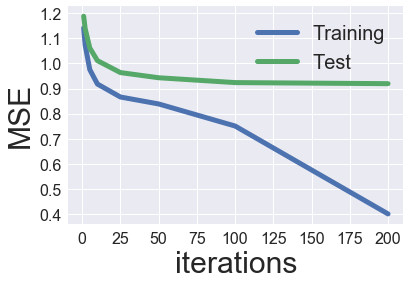

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def plot_learning_curve(iter_array, model):
    plt.plot(iter_array, model.train_mse, label='Training', linewidth=5)
    plt.plot(iter_array, model.test_mse, label='Test', linewidth=5)
    
    plt.xticks(fontsize=16);
    plt.yticks(fontsize=16);
    plt.xlabel('iterations', fontsize=30);
    plt.ylabel('MSE', fontsize=30);
    plt.legend(loc='best', fontsize=20);
    
plot_learning_curve(iter_array, MF_SGD)

In [19]:
iter_array = [1, 2, 5, 10, 25, 50, 100, 200]
learning_rates = [1e-5, 1e-4, 1e-3, 1e-2]

best_params = {}
best_params['learning_rate'] = None
best_params['n_iter'] = 0
best_params['train_mse'] = np.inf
best_params['test_mse'] = np.inf
best_params['model'] = None

for rate in learning_rates:
    print 'Rate: {}'.format(rate)
    MF_SGD = ExplicitMF(train, n_factors=40, learning='sgd')
    MF_SGD.calculate_learning_curve(iter_array, test, learning_rate=rate)
    min_idx = np.argmin(MF_SGD.test_mse)
    if MF_SGD.test_mse[min_idx] < best_params['test_mse']:        
        best_params['n_iter'] = iter_array[min_idx]
        best_params['learning_rate'] = rate
        best_params['train_mse'] = MF_SGD.train_mse[min_idx]
        best_params['test_mse'] = MF_SGD.test_mse[min_idx]
        best_params['model'] = MF_SGD
        print 'New optimal hyperparameters'
        print pd.Series(best_params)

Rate: 1e-05
New optimal hyperparameters
learning_rate                                                1e-05
model            <ExplicitMF.ExplicitMF instance at 0x000000000...
n_iter                                                         200
test_mse                                                   1.13841
train_mse                                                  1.07205
dtype: object
Rate: 0.0001
New optimal hyperparameters
learning_rate                                               0.0001
model            <ExplicitMF.ExplicitMF instance at 0x000000001...
n_iter                                                         200
test_mse                                                  0.973123
train_mse                                                 0.876724
dtype: object
Rate: 0.001
New optimal hyperparameters
learning_rate                                                0.001
model            <ExplicitMF.ExplicitMF instance at 0x000000001...
n_iter                                         

In [20]:
iter_array = [1, 2, 5, 10, 25, 50, 100, 200]
latent_factors = [5, 10, 20, 40, 80]
regularizations = [0.001, 0.01, 0.1, 1.]
regularizations.sort()

best_params = {}
best_params['n_factors'] = latent_factors[0]
best_params['reg'] = regularizations[0]
best_params['n_iter'] = 0
best_params['train_mse'] = np.inf
best_params['test_mse'] = np.inf
best_params['model'] = None

for fact in latent_factors:
    print 'Factors: {}'.format(fact)
    for reg in regularizations:
        print 'Regularizations: {}'.format(reg)
        MF_SGD = ExplicitMF(train, n_factors=fact, learning='sgd',\
                           user_fact_reg=reg, item_fact_reg=reg,\
                           user_bias_reg=reg, item_bias_reg=reg)
        MF_SGD.calculate_learning_curve(iter_array, test,\
                                        learning_rate=0.001)
        min_idx = np.argmin(MF_SGD.test_mse)
        if MF_SGD.test_mse[min_idx] < best_params['test_mse']:
            best_params['n_factors'] = fact
            best_params['reg'] = reg
            best_params['n_iter'] = iter_array[min_idx]
            best_params['train_mse'] = MF_SGD.train_mse[min_idx]
            best_params['test_mse'] = MF_SGD.test_mse[min_idx]
            best_params['model'] = MF_SGD
            print 'New optimal hyperparameters'
            print pd.Series(best_params)

Factors: 5
Regularizations: 0.001
New optimal hyperparameters
model        <ExplicitMF.ExplicitMF instance at 0x000000000...
n_factors                                                    5
n_iter                                                     100
reg                                                      0.001
test_mse                                              0.943688
train_mse                                             0.768958
dtype: object
Regularizations: 0.01
New optimal hyperparameters
model        <ExplicitMF.ExplicitMF instance at 0x000000000...
n_factors                                                    5
n_iter                                                     100
reg                                                       0.01
test_mse                                              0.938148
train_mse                                             0.753012
dtype: object
Regularizations: 0.1
New optimal hyperparameters
model        <ExplicitMF.ExplicitMF instance at 0x00000

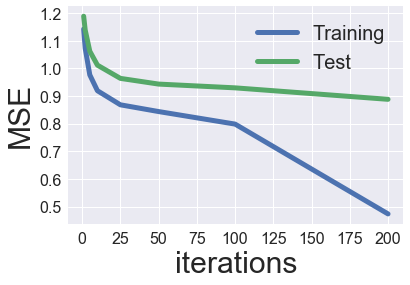

In [21]:
plot_learning_curve(iter_array, best_params['model'])

In [22]:
print 'Best regularization: {}'.format(best_params['reg'])
print 'Best latent factors: {}'.format(best_params['n_factors'])
print 'Best iterations: {}'.format(best_params['n_iter'])

Best regularization: 0.01
Best latent factors: 80
Best iterations: 200


In [7]:
best_sgd_model = ExplicitMF(ratings, n_factors=80, learning='sgd', \
                            item_fact_reg=0.01, user_fact_reg=0.01, \
                            user_bias_reg=0.01, item_bias_reg=0.01)
best_sgd_model.train(200, learning_rate=0.001)

In [11]:
from IPython.display import HTML

def display_top_k_movies(similarity, idx_to_movie, movie_idx, k=5):
    movie_indices = np.argsort(similarity[movie_idx,:])[::-1]
    movie_idx_list = ''
    k_ctr = 0
    # Start i at 1 to not grab the input movie
    i = 1
    while k_ctr < 30:
        movie = idx_to_movie[movie_indices[i]]
        if movie != '':
            movie_idx_list += "<h4>- %s<h4/>"\
                      % movie
            k_ctr += 1
        i += 1
    display(HTML(movie_idx_list))

def compare_recs(sgd_similarity, idx_to_movie\
                 , movie_idx, k=5):

    # Display SGD Recs
    display(HTML('<font size=5>'+'SGD Recs'+'</font>'))
    display_top_k_movies(sgd_similarity,\
                         idx_to_movie, movie_idx)

In [9]:
def cosine_similarity(model):
    sim = model.item_vecs.dot(model.item_vecs.T)
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return sim / norms / norms.T

sgd_sim = cosine_similarity(best_sgd_model)

In [13]:
sgd_sim = best_sgd_model.cosine_similarity()

In [12]:
# Load in movie data
idx_to_movie = {}
with open('u.item', 'r') as f:
    for line in f.readlines():
        info = line.split('|')
        idx_to_movie[int(info[0])-1] = info[0] + ' : ' + info[1]

In [15]:
idx = 126 # Toy Story
compare_recs(sgd_sim, idx_to_movie, idx)

In [19]:
my_ratings = np.zeros((1682, 1))

In [20]:
# Action/Gangster
# my_ratings[587] = 5
# my_ratings[70] = 5
# my_ratings[5] = 5
# my_ratings[52] = 4
# my_ratings[126] = 5
# my_ratings[121] = 4
# my_ratings[830] = 5
# my_ratings[186] = 5
# my_ratings[1378] = 1

#Animation
my_ratings[0] = 5
my_ratings[587] = 2
my_ratings[94] = 5
my_ratings[70] = 1
my_ratings[425] = 2
my_ratings[500] = 4
my_ratings[417] = 5
my_ratings[968] = 5
my_ratings[464] = 5
my_ratings[5] = 2
my_ratings[52] = 1
my_ratings[126] = 2
my_ratings[150] = 1
my_ratings[186] = 2
my_ratings[1378] = 2

# my_ratings[0] = 4  
# my_ratings[6] = 3  
# my_ratings[11] = 5  
# my_ratings[53] = 4  
# my_ratings[63] = 5  
# my_ratings[65] = 3  
# my_ratings[68] = 5  
# my_ratings[97] = 2  
# my_ratings[182] = 4  
# my_ratings[225] = 5  
# my_ratings[354] = 5

In [9]:
users = ratings.shape[0]
movies = ratings.shape[1]
movies_mean = np.zeros((1, movies))
movies_norm = np.zeros((users, movies))

R = np.zeros((users,movies))
for us in range(users):
    for mo in range(movies):
        if ratings[us,mo] >= 1.0:
            R[us,mo] = 1
        else:
            R[us,mo] = 0

for i in range(movies):
    idx = np.where(R[:,i] == 1)[0]
    movies_mean[0][i] = ratings[idx,i].mean()
    movies_norm[idx,i] = ratings[idx,i] - movies_mean[0][i]

In [9]:
ratings_edit = ratings

#ratings_edit = np.delete(ratings, (-1), axis=0)
ratings_edit = np.append(ratings_edit, my_ratings.T, axis=0)


users = ratings_edit.shape[0]
movies = ratings_edit.shape[1]
movies_mean = np.zeros((1, movies))
movies_norm = np.zeros((users, movies))

R = np.zeros((users,movies))
for us in range(users):
    for mo in range(movies):
        if ratings_edit[us,mo] >= 1.0:
            R[us,mo] = 1
        else:
            R[us,mo] = 0

for i in range(movies):
    idx = np.where(R[:,i] == 1)[0]
    movies_mean[0][i] = ratings_edit[idx,i].mean()
    movies_norm[idx,i] = ratings_edit[idx,i] - movies_mean[0][i]

NameError: name 'my_ratings' is not defined

In [10]:
best_sgd_model = ExplicitMF(movies_norm, n_factors=80, learning='sgd', \
                            item_fact_reg=0.01, user_fact_reg=0.01, \
                            user_bias_reg=0.01, item_bias_reg=0.01)
best_sgd_model.train(200, learning_rate=0.001)

In [13]:
predict_all_user = best_sgd_model.predict_all()

In [18]:
my_preds = predict_all_user[-1,:] + movies_mean[0]
sorted_preds = np.sort(my_preds, axis=0)[::-1]
sorted_preds[:10]

array([8.4652298 , 8.4326873 , 8.31134237, 8.30037969, 8.25657492,
       8.25280383, 8.23684771, 8.22305086, 8.21893635, 8.18440278])

In [19]:
my_idx = np.argsort(my_preds, axis=0)[::-1]

def display_only(my_idx, idx_to_movie):
    movie_idx_list = ''
    k_ctr = 0
    i = 1
    while k_ctr < 20:
        movie = idx_to_movie[my_idx[i]]
        if movie != '':
            movie_idx_list += "<h4>- %s<h4/>"\
                      % movie
            k_ctr += 1
        i += 1
    display(HTML(movie_idx_list))
    
print("Top 10 movie recommendation")
display_only(my_idx, idx_to_movie)

Top 10 movie recommendation


In [21]:
new_user_rec = my_ratings.T.dot(best_sgd_model.item_vecs)\
                    .dot(best_sgd_model.item_vecs.T)
    
new_user_rec

array([[37.7508552 ,  1.65018738, -8.95242707, ...,  0.05850079,
         0.49539755, -0.24913026]])

In [33]:
new_user_rec = movies_norm[-1,:].dot(best_sgd_model.item_vecs)\
                    .dot(best_sgd_model.item_vecs.T)
    
new_user_rec = new_user_rec + movies_mean[0]

new_user_rec

array([7.63973974, 4.57195567, 5.73652834, ..., 2.00897689, 2.9195613 ,
       2.84566493])

In [22]:
# movies_new = my_ratings.shape[0]
# my_preds = np.zeros((1,movies_new))

# for u in xrange(new_user_rec.shape[0]):
#     for m in xrange(best_sgd_model.item_vecs.shape[0]):
#         my_preds[u,m] = best_sgd_model.global_bias + best_sgd_model.user_bias[u] + best_sgd_model.item_bias[i]
#         my_preds[u,m] += new_user_rec[u, :].dot(best_sgd_model.item_vecs[i, :].T)

# my_preds = new_user_rec.dot(best_sgd_model.item_vecs.T)


sorted_preds = np.sort(new_user_rec[0,:], axis=0)[::-1]
sorted_preds[:30]

array([37.7508552 , 29.58132802, 27.04501292, 26.54252701, 25.95917472,
       25.95689404, 25.23043902, 23.12748587, 22.3477972 , 21.13632531,
       20.05476214, 19.9177854 , 19.81680054, 19.13557397, 18.9522382 ,
       18.61891387, 17.1944145 , 16.72224261, 16.683199  , 15.60897341,
       15.2938833 , 14.81100467, 14.76383354, 14.50421971, 14.4037731 ,
       14.28569755, 14.22828477, 14.12872401, 13.74016158, 13.71608792])

In [23]:
my_idx = np.argsort(new_user_rec[0,:], axis=0)[::-1]

def display_only(my_idx, idx_to_movie):
    movie_idx_list = ''
    k_ctr = 0
    i = 1
    while k_ctr < 30:
        movie = idx_to_movie[my_idx[i]]
        if movie != '':
            movie_idx_list += "<h4>- %s<h4/>"\
                      % movie
            k_ctr += 1
        i += 1
    display(HTML(movie_idx_list))
    
print("Top 10 movie recommendation")
display_only(my_idx, idx_to_movie)

Top 10 movie recommendation


In [3]:
X = np.array([[1], [2], [3]])
y = np.array([[1], [2.5], [3.5]])

In [4]:
get_theta = lambda theta: np.array([[0, theta]])

In [5]:
thetas = list(map(get_theta, [0.5, 1.0, 1.5]))
print(thetas)

[array([[0. , 0.5]]), array([[0., 1.]]), array([[0. , 1.5]])]


In [6]:
X = np.hstack([np.ones([3, 1]), X])
print(X)

[[1. 1.]
 [1. 2.]
 [1. 3.]]


In [7]:
def cost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [8]:
for i in range(len(thetas)):
    print(cost(X, y, thetas[i]))

1.0833333333333333
0.08333333333333333
0.25


In [7]:
#initialize random number
user_vecs = np.random.normal(scale=1./5,size=(4,2))
print(user_vecs)

[[-0.17415943 -0.11576993]
 [-0.06231051  0.01123307]
 [-0.23302997  0.1801653 ]
 [ 0.09313249 -0.30724874]]


In [9]:
print(user_vecs[0,:])

[-0.17415943 -0.11576993]


In [10]:
item_vecs = np.random.normal(scale=1./5,size=(5,2))
print(item_vecs)

[[ 0.29765044  0.37917784]
 [ 0.23575591 -0.03598497]
 [-0.21415052  0.21089035]
 [-0.08063539  0.24448901]
 [ 0.041655    0.19532781]]


In [21]:
item_vecs = np.matrix([[-0.17415943,-0.11576993],
             [-0.06231051,0.01123307],
             [-0.23302997,0.1801653 ],
             [ 0.09313249,-0.30724874]])

user_vecs = np.matrix([[ 0.29765044,0.37917784],
             [ 0.23575591,-0.03598497],
             [-0.21415052,0.21089035],
             [-0.08063539,0.24448901],
             [ 0.041655,0.19532781]])

In [22]:
prediction = user_vecs[0, :].dot(item_vecs[0, :].T)
print(prediction)

[[-0.09573602]]


In [9]:
item_vecs = np.matrix([[ 0.90998808, -1.00154913],
       [ 0.85788531, -0.89118291],
       [ 0.3216885 , -1.11450449],
       [-0.81248112,  1.22473547],
       [-1.12746689,  0.89871308]])

user_vecs = np.matrix([[ 1.47868693, -0.42541134],
       [ 1.16749823, -0.64959742],
       [-0.58802807,  1.56414819],
       [-0.10761304,  1.52321668]])

In [10]:
user_pref = user_vecs[0, :].dot(item_vecs.T)
print(user_pref)

[[ 1.77165784  1.64766311  0.94979943 -1.72242157 -2.04949329]]


In [15]:
user_pref2 = user_vecs[2, :].dot(item_vecs.T)
print(user_pref2)

[[-2.10166979 -1.89840278 -1.93241205  2.39342947  2.06870262]]
